In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/Excel2.xlsx")

In [2]:
df.shape

(125, 48)

In [3]:
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

Rank in 2020                                      48
Students per Staff                                47
Rank in 2019                                      46
Rank in 2021                                      38
Research Quality                                  38
International course experience rank 2022-2021    38
International work mobility rank 2022-2021        38
Value for money rank 2022-2021                    38
2020.Overall satisfaction                         35
2020.International board (%)                      35
2020.International students (%)                   35
2020.Average course length (months)               35
2020.Extra languages                              35
2020.International mobility rank                  35
2020.International faculty (%)                    35
2020.Weighted salary (US$)                        35
2020.Faculty with doctorates (%)                  35
Faculty Change                                    30
Satisfaction Change                           

In [4]:
numerical_columns = df.select_dtypes(include=['number'])
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
     LinkedIn Followers  Instagram engagement %  Research Quality  \
0              114985.0                    0.68              81.4   
1              289801.0                    0.91              38.8   
2              536866.0                    0.45              95.4   
3              190577.0                    3.28              24.9   
4              184493.0                    1.77               NaN   
5              308968.0                    0.65              68.2   
6               36932.0                    0.86              84.0   
7               97316.0                    1.76              96.9   
8              297425.0                    0.61               NaN   
9              207086.0                    1.30               NaN   
10              95715.0                    1.21               NaN   
11             114392.0                    1.00               NaN   
12              72418.0                    2.43              90.2   
13             

In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
                                           School Name  \
0                              University of St Gallen   
1                                            HEC Paris   
2                               London Business School   
3                                Essec Business School   
4                                 ESCP Business School   
5                       SDA Bocconi/Università Bocconi   
6                   University College Dublin: Smurfit   
7    Rotterdam School of Management, Erasmus Univer...   
8                                   IE Business School   
9                                Esade Business School   
10                       Stockholm School of Economics   
11    WU (Vienna University of Economics and Business)   
12                              University of Mannheim   
13                    Imperial College Business School   
14            WHU – Otto Beisheim School of Management   
15                               Edhec Business Sch

In [6]:
df['2020.International board (%)'].fillna(0, inplace=True)
df['2020.International board (%)'].replace('0 ††', 0, inplace=True)
df['2020.International board (%)'] = df['2020.International board (%)'].astype(int)

In [7]:
df.columns

Index(['School Name', 'LinkedIn Followers', 'Instagram engagement %',
       'Research Quality', 'Citations per Faculty',
       'Average Experience of Faculty', 'Students per Staff', 'Rank in 2019',
       '2020.Faculty with doctorates (%)', '2020.Weighted salary (US$)',
       '2020.International faculty (%)', '2020.International mobility rank',
       '2020.International board (%)', '2020.Extra languages',
       '2020.Average course length (months)', '2020.Overall satisfaction',
       '2020.International students (%)', '2021.Women on board (%)',
       '2021.Employed at three months (%)', 'Delimited',
       '2021.International faculty (%)', '2021.International mobility rank',
       '2021.Female students (%)', '2022.Careers service rank',
       '2022.International course experience rank', '2022.Internships (%)',
       '2022.Faculty with doctorates (%)', 'Rank in 2020', 'Rank in 2021',
       '2022.Average course length (months)', '2022.Overall satisfaction',
       '2022.Women 

In [8]:
df.drop("Rank in 2020", inplace=True, axis=1)
df.drop("Rank in 2019", inplace=True, axis=1)

In [9]:
df["binned_group"] = pd.cut(df["Rank in 2021"], bins = 10, labels=["1-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"])

In [10]:
df['binned_group'] = df['binned_group'].cat.add_categories('Do Not Stand in Ranking')
df['binned_group'] = df['binned_group'].fillna('Do Not Stand in Ranking')
df["rank_coded"] = df["Rank in 2021"].apply(lambda val: 1 if val <= 30 else 0)
df.drop("Rank in 2021", inplace=True, axis=1)

In [11]:
df['binned_group']

0                         1-10
1                         1-10
2                         1-10
3                         1-10
4                         1-10
5                        11-20
6                         1-10
7                         1-10
8                        11-20
9                        11-20
10                        1-10
11                       11-20
12                       21-30
13                        1-10
14                       11-20
15                        1-10
16                       31-40
17                       11-20
18                       11-20
19                       21-30
20                       41-50
21                       41-50
22                       31-40
23                       21-30
24                       21-30
25                       41-50
26                       31-40
27                       31-40
28                       21-30
29                       31-40
30                       31-40
31                       41-50
32      

In [12]:
df.columns

Index(['School Name', 'LinkedIn Followers', 'Instagram engagement %',
       'Research Quality', 'Citations per Faculty',
       'Average Experience of Faculty', 'Students per Staff',
       '2020.Faculty with doctorates (%)', '2020.Weighted salary (US$)',
       '2020.International faculty (%)', '2020.International mobility rank',
       '2020.International board (%)', '2020.Extra languages',
       '2020.Average course length (months)', '2020.Overall satisfaction',
       '2020.International students (%)', '2021.Women on board (%)',
       '2021.Employed at three months (%)', 'Delimited',
       '2021.International faculty (%)', '2021.International mobility rank',
       '2021.Female students (%)', '2022.Careers service rank',
       '2022.International course experience rank', '2022.Internships (%)',
       '2022.Faculty with doctorates (%)',
       '2022.Average course length (months)', '2022.Overall satisfaction',
       '2022.Women on board (%)', '2022.Female students (%)',
     

In [13]:
X = df.drop(['School Name','binned_group','rank_coded'], axis=1).values

In [14]:
X.shape

(125, 44)

In [15]:
y= df["binned_group"].values

In [16]:
y.shape

(125,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_num = SimpleImputer(strategy='mean')
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

In [19]:
nan_count = np.isnan(X_train).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


In [20]:
nan_count = np.isnan(X_test).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


(100, 44)
(100,)


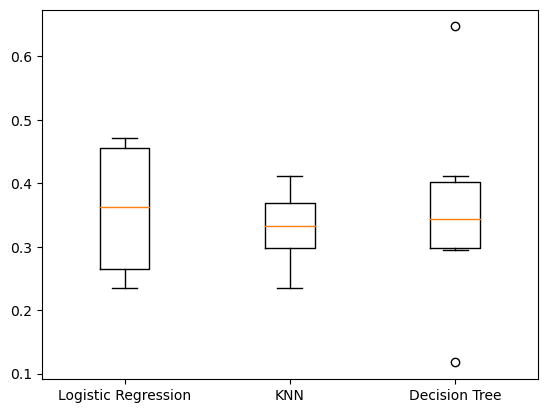

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(y_train.shape)
models = {"Logistic Regression": LogisticRegression(max_iter=1000), "KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier(max_depth=7)}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [22]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.48
KNN Test Set Accuracy: 0.4
Decision Tree Test Set Accuracy: 0.28


In [23]:
dt = DecisionTreeClassifier(max_depth=5)
kf = KFold(n_splits=6, random_state=42, shuffle=True)
cv_results = cross_val_score(dt, X_train_scaled, y_train, cv=kf)
dt.fit(X_train_scaled, y_train)
test_score = dt.score(X_test_scaled, y_test)
importances_rf = pd.Series(dt.feature_importances_, index = pd.DataFrame(X).columns)
sorted_importances_rf = importances_rf.sort_values()
df_sorted_importances = pd.DataFrame(sorted_importances_rf, columns=['Importance'])
df_sorted_importances.to_excel('sorted_importances_rf.xlsx', index=True)

In [24]:
y= df["rank_coded"].values
X = df.drop(['School Name','binned_group','rank_coded'], axis=1).values

In [25]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np
imp_num = SimpleImputer(strategy='mean')
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=SEED)
adb_clf = AdaBoostClassifier(estimator=dt, n_estimators=100)
adb_clf.fit(X_train, y_train)
threshold = 0.5  # Set your desired threshold
y_pred = adb_clf.predict(X_test)
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred)

In [29]:
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 0.81
accuracy score: 0.88


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(loss='log_loss',  
    learning_rate=0.1,  
    n_estimators=100,  
    max_depth=3,  
    min_samples_split=2, 
    min_samples_leaf=1,  
    subsample=1.0,  
    random_state=42)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
gb_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(gb_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 0.89
accuracy score: 0.92


In [31]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0)  # 'verbose=0' to avoid too much logging
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
cat_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(cat_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 0.83
accuracy score: 0.92


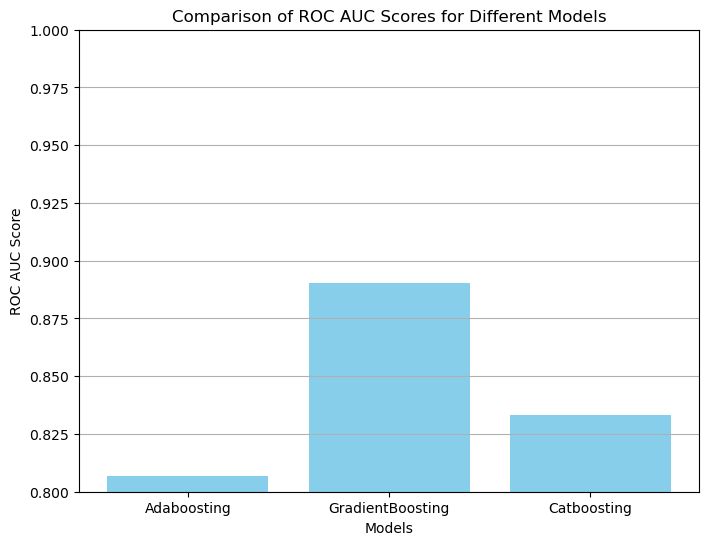

In [32]:
model_names = ['Adaboosting', 'GradientBoosting', 'Catboosting']  # Replace with your model names
roc_auc_scores = [adb_clf_roc_auc_score, gb_roc_auc_score, cat_roc_auc_score]
# Plotting ROC AUC scores for three models
plt.figure(figsize=(8, 6))
plt.bar(model_names, roc_auc_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of ROC AUC Scores for Different Models')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_roc_auc_score = roc_auc_score(y_test, y_pred)
print('ROC AUC score: {:.2f}'.format(rf_roc_auc_score))
print('accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

ROC AUC score: 0.75
accuracy score: 0.88


In [34]:
importances_rf = pd.Series(adb_clf.feature_importances_, index = pd.DataFrame(X).columns)
sorted_importances_rf = importances_rf.sort_values()
df_sorted_importances = pd.DataFrame(sorted_importances_rf, columns=['Importance'])
df_sorted_importances.to_excel('sorted_importances_ada.xlsx', index=True)
importances_rf = pd.Series(rf.feature_importances_, index = pd.DataFrame(X).columns)
sorted_importances_rf = importances_rf.sort_values()
df_sorted_importances = pd.DataFrame(sorted_importances_rf, columns=['Importance'])
df_sorted_importances.to_excel('sorted_importances_rf.xlsx', index=True)
importances_rf = pd.Series(catboost_model.feature_importances_, index = pd.DataFrame(X).columns)
sorted_importances_rf = importances_rf.sort_values()
df_sorted_importances = pd.DataFrame(sorted_importances_rf, columns=['Importance'])
df_sorted_importances.to_excel('sorted_importances_cat.xlsx', index=True)
importances_rf = pd.Series(gbt.feature_importances_, index = pd.DataFrame(X).columns)
sorted_importances_rf = importances_rf.sort_values()
df_sorted_importances = pd.DataFrame(sorted_importances_rf, columns=['Importance'])
df_sorted_importances.to_excel('sorted_importances_gb.xlsx', index=True)

In [35]:
feature_importances = catboost_model.feature_importances_
feature_names = df.drop(['School Name', 'binned_group', 'rank_coded'], axis=1).columns.tolist()


# Map feature importances to their respective column names
importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display sorted feature importances
for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: 2020.Faculty with doctorates (%), Importance: 11.696416435748217
Feature: 2020.Weighted salary (US$), Importance: 6.595849928212567
Feature: 2022.Weighted salary (US$), Importance: 6.494667674639103
Feature: 2020.International mobility rank, Importance: 5.844937133584876
Feature: 2021.International mobility rank, Importance: 4.994357073171778
Feature: 2022.Faculty with doctorates (%), Importance: 4.770536394882913
Feature: LinkedIn Followers, Importance: 4.068227772536032
Feature: 2022.Careers service rank, Importance: 3.010238750581156
Feature: Faculty Change, Importance: 2.958823076442778
Feature: International work mobility Rank Stability, Importance: 2.9328801816377608
Feature: 2021.Employed at three months (%), Importance: 2.656343202054313
Feature: 2020.Overall satisfaction, Importance: 2.6155389426650366
Feature: 2020.Extra languages, Importance: 2.2266419389032266
Feature: 2022.Overall satisfaction, Importance: 2.130376672309258
Feature: 2022.International course exper

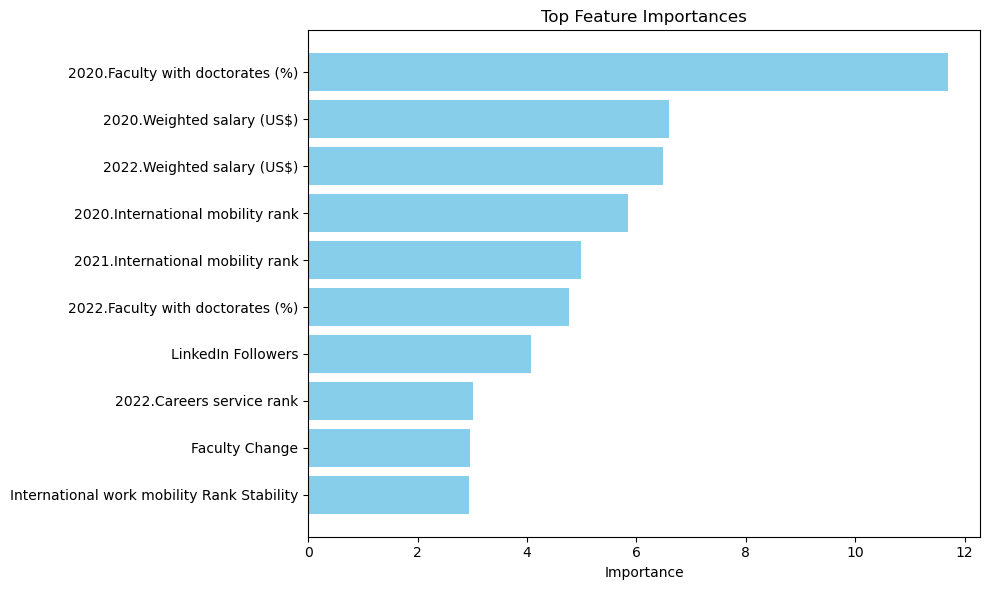

In [36]:
import matplotlib.pyplot as plt

# Take the top 'n' most important features for visualization (e.g., top 10)
n = 10  # Change this value based on the number of features you want to display

# Extract feature names and importances
top_features = [pair[0] for pair in sorted_importances[:n]]
top_importances = [pair[1] for pair in sorted_importances[:n]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top Feature Importances')

plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show plot
plt.show()